In [35]:
import pandas as pd

# 문제 정의

농구 선수의 경기 기록을 바탕으로, 그 선수의 포지션을 예측하라

# 데이터 수집

In [36]:
# 데이터를 수집합니다
df = pd.read_csv("../data/basketball_stat.csv")

In [37]:
# 수집된 데이터 샘플을 확인합니다
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


**컬럼 주석**  
Player : 선수 이름  
Pos: 포지션  
3P: 성공한 3점슛 횟수  
2P: 성공한 2점슛 횟수  
TRB: 리바운드 횟수  
AST: 어시스트 횟수  
STL: 공 가로채기 횟수  
BLK: 블로킹 횟수  

SG: 슈팅 가드(영어: Shooting guard, SG)는 농구의 포지션 중 하나이다. 코트 내에서 3PT 등 장거리에서 슛을 하여 점수를 얻는 역할을 한다. 일반적으로 이 포지션의 선수는 포인트 가드 선수보다 키가 크고, 슈팅을 하는 횟수도 포인트 가드보다 많아진다.  

C: 센터 (영어: Center, C)는 농구의 포지션 중 하나이다. 골대, 포스트 근처에서 슛을 블로킹하고, 리바운드하며, 공을 바깥쪽으로 빼줘서 공격 찬스를 만들기도 하며, 골대 근처에서 2점 슈팅을 하기도 합니다.

In [38]:
# 현재 가지고 있는 데이터에서, 포지션의 갯수를 확인한다
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

포지션의 갯수를 확인한 결과, 우리의 데이터는 C (센터)와 SG (슈팅 가드) 포지션만 가지고 있습니다.  
이번 예제에서는 센터와 슈팅 가드만을 분류해보도록 하겠습니다.

# 데이터 시각화

데이터를 특징을 바탕으로 한 공간에 시각화함으로써,우리는 머신러닝 학습에 필요한 특징과 불필요한 특징을 쉽게 구분지을 수 있습니다.

슈팅 가드와 센터의 역할을 통해, 우리는 2점슛, 스틸, 어시스트는 나름대로 센터와 슈팅가드를 분류하는 데    
분별력이 없는 특징이란 것을 알 수 있습니다.이 세가지 특징이 정말 분별력이 없는 지는 데이터를 시각화함으로써,  
더 확실시 할 수 있습니다.

Text(0.5,1,'STL and 2P in 2d plane')

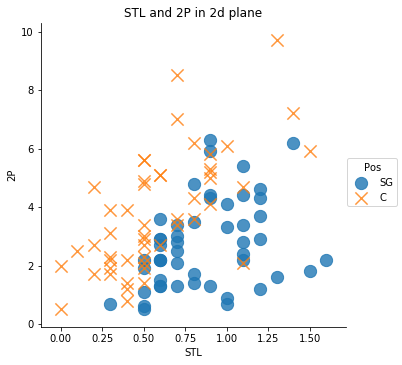

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 스틸, 2점슛 데이터 시각화
sns.lmplot('STL', '2P', data=df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
           hue="Pos") # 예측값

# title
plt.title('STL and 2P in 2d plane')

Text(0.5,1,'AST and 2P in 2d plane')

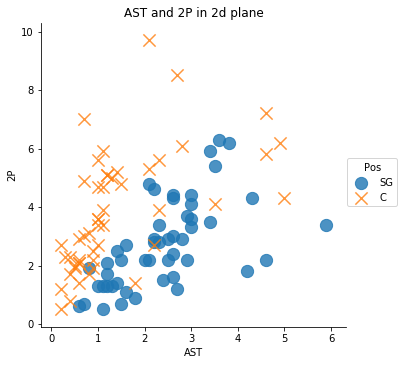

In [40]:
# 어시스트, 2점슛 데이터 시각화
sns.lmplot('AST', '2P', data=df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
           hue="Pos") # 예측값

# title
plt.title('AST and 2P in 2d plane')

보시다시피, 2점슛, 스틸, 어시스트의 특징으로 데이터를 분류하기에는, 슈팅가드 데이터와 센터 데이터들이 서로 너무 근접하여,   
슈팅가드와 센터를 분별하기 어렵습니다. 이처럼 데이터를 시각화하면 보다 객관적으로 필요한 특징과 불필요한 특징을  
구분지을 수 있습니다.

이번에는 3점슛, 블로킹, 리바운드로 데이터를 시각화해보도록 하겠습니다.

Text(0.5,1,'BLK and 3P in 2d plane')

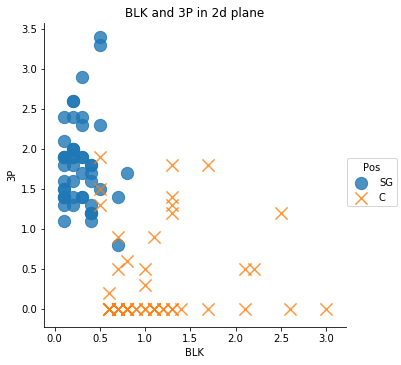

In [41]:
# 블로킹, 3점슛 데이터 시각화
sns.lmplot('BLK', '3P', data=df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
           hue="Pos") # 예측값

# title
plt.title('BLK and 3P in 2d plane')

Text(0.5,1,'TRB and 3P in 2d plane')

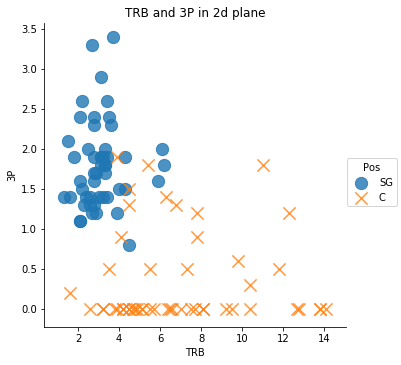

In [42]:
# 리바운드, 3점슛 데이터 시각화
sns.lmplot('TRB', '3P', data=df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x"],
           hue="Pos") # 예측값

# title
plt.title('TRB and 3P in 2d plane')

우리의 가설처럼 3점슛과 블로킹, 그리고 리바운드 특징으로 데이터를 분류하면, 슈팅가드 데이터와 센터 데이터의 데이터가   
멀리 떨어지게 되어 머신러닝 모델의 분류 정확도가 높아질 것을 예상할 수 있습니다.  
  
이처럼 데이터를 시각화하면 보다 객관적으로 필요한 특징과 불필요한 특징을  
구분지을 수 있습니다.

# 데이터 다듬기

In [43]:
# 분별력이 없는 특징(feature)을 데이터에서 제거합니다
df.drop(['2P', 'AST', 'STL'], axis=1, inplace = True)

# 데이터 나누기 (학습 데이터, 테스트 데이터)

In [44]:
# sklearn의 train_test_split을 사용하면 라인 한줄로 손쉽게 데이터를 나눌 수 있다
from sklearn.model_selection import train_test_split

# 다듬어진 데이터에서 20%를 테스트 데이터로 분류합니다
train, test = train_test_split(df, test_size=0.2)

In [45]:
# 학습 데이터의 갯수를 확인합니다, 80개의 데이터가 있습니다.
train.shape[0]

80

In [46]:
# 테스트 데이터의 갯수를 확인합니다. 20개의 데이터가 있습니다.
test.shape[0]

20

# SVM 최적의 파라미터 찾기
SVM의 파라미터는 두가지가 있습니다.
1. C : 비용 (cost), 결정경계선의 마진을 결정하는 파라미터입니다.
2. gamma: 커널의 데이터포인트의 표준편차를 결정하는 파라미터입니다.

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import numpy as np

sklearn에서 제공하는 gridsearch를 사용하시면, 손쉽게 최적의 C, gamma를 구하실 수 있습니다.

In [48]:
def svc_param_selection(X, y, nfolds):
    svm_parameters = [
                        {'kernel': ['rbf'],
                         'gamma': [0.00001,0.0001, 0.001, 0.01, 0.1, 1],
                         'C': [0.01, 0.1, 1, 10, 100, 1000]
                        }
                       ]
    
    clf = GridSearchCV(SVC(), svm_parameters, cv=10)
    clf.fit(X_train, y_train.values.ravel())
    print(clf.best_params_)
    
    return clf

In [49]:
X_train = train[['3P', 'BLK']]
y_train = train[['Pos']]
# 최적의 파라미터를 sklearn의 gridsearch를 통해 구합니다.
clf = svc_param_selection(X_train, y_train.values.ravel(), 10)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


# 시각화
최적의 파라미터일 때의 결정경계선과, 다른 파라미터들일 때의 결정경계선을 비교해봅니다.

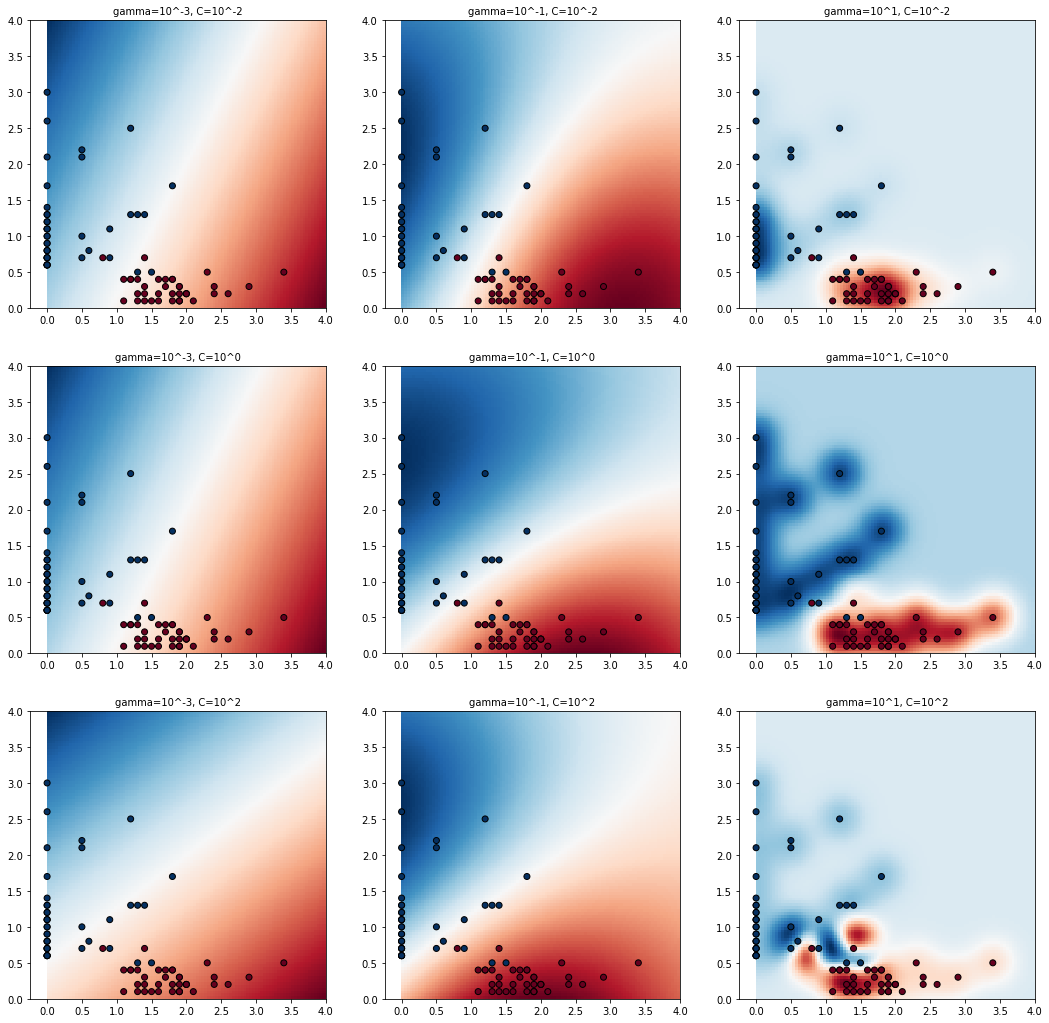

In [50]:
# 시각화를 하기 위해, 최적의 C와 최적의 C를 비교하기 위한 다른 C를 후보로 저장합니다.
C_canditates = []
C_canditates.append(clf.best_params_['C'] * 0.01)
C_canditates.append(clf.best_params_['C'])
C_canditates.append(clf.best_params_['C'] * 100)

# 시각화를 하기 위해, 최적의 gamma와 최적의 gamma를 비교하기 위한 다른 gamma를 후보로 저장합니다.
gamma_candidates = []
gamma_candidates.append(clf.best_params_['gamma'] * 0.01)
gamma_candidates.append(clf.best_params_['gamma'])
gamma_candidates.append(clf.best_params_['gamma'] * 100)

X = train[['3P', 'BLK']]
Y = train['Pos'].tolist()

# 포지션에 해당하는 문자열 SG와 C를 벡터화합니다.
position = []
for gt in Y:
    if gt == 'C':
        position.append(0)
    else:
        position.append(1)

# 각각의 파라미터에 해당하는 SVM 모델을 만들어 classifiers에 저장합니다.
classifiers = []
for C in C_canditates:
    for gamma in gamma_candidates:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, Y)
        classifiers.append((C, gamma, clf))

# 18,18 사이즈의 챠트를 구성합니다.
plt.figure(figsize=(18, 18))
xx, yy = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))

# 각각의 모델들에 대한 결정 경계 함수를 적용하여 함께 시각화합니다.
for (k, (C, gamma, clf)) in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 최적의 모델을 포함한 다른 파라미터로 학습된 모델들을 함께 시각화해봅니다.
    plt.subplot(len(C_canditates), len(gamma_candidates), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # 서포트 벡터와 결정경계선을 시각화합니다.
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X['3P'], X['BLK'], c=position, cmap=plt.cm.RdBu_r, edgecolors='k')

# 테스트
sklearn의 gridsearch로 얻어진 최적의 파라미터로 학습된 clf를 이용하여,  
테스트를 진행합니다.

In [51]:
# 테스트에 사용될 특징을 지정합니다
X_test = test[['3P', 'BLK']]

# 특징으로 예측할 값 (농구선수 포지션)을 지정합니다
y_test = test[['Pos']]

# 최적의 파라미터로 완성된 SVM에 테스트 데이터를 주입하여, 실제값과 예측값을 얻습니다.
y_true, y_pred = y_test, clf.predict(X_test)

print(classification_report(y_true, y_pred))
print()
print("accuracy : "+ str(accuracy_score(y_true, y_pred)) )

             precision    recall  f1-score   support

          C       0.88      0.88      0.88         8
         SG       0.92      0.92      0.92        12

avg / total       0.90      0.90      0.90        20


accuracy : 0.9
